##### <h1 style="text-align:center"> Drexel University </h1>
<h2 style = "text-align:center"> College of Computing and Informatics</h2>
<h2 style = "text-align:center">DSCI 631: Applied Machine Learning</h2>
<h3 style = "text-align:center">Assignment 2</h3>
<h4> </h4>


<h3 style="color:red; font-weight:bold; text-decoration: underline">DON'T FORGET TO PUT YOUR TEAM MEMBERS' NAMES BELOW</h3>
### TEAM MEMBERS:

### A. Assignment Overview
This assignment provides the opportunity for you to practice with various skills in feature analysis, feature selection, bclassification (imbalance handling), regression and model tuning.

<h4 style="color:blue; font-weight:bold">The goal of this assignment is to provide a realistic setting for a machine learning task. Therefore instructions will not specify the exact steps to carry out. Instead, it is part of the assignment to identify promising features, models and preprocessing methods and apply them as appropriate.</h4>


### B. What to Hand In
	
Sumbit a completed this Jupyter notebook. 

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59 pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation.

### F. Academic Honesty

Each student is required to submit the Academic Honesty Form at the beginning of the term to cover all the deliverables (for example: assignments, projects, quizzes). Each piece of work must be original. That means, individual quizzes must be done individually without discussing and collaborating with anybody else. Team assignments must be written and programmed by your own team members. No team should copy any piece of work from other teams. The Drexel University Academic Honesty Rules and Procedures (as stated in the student handbook) will be adhered to strictly.  

### G. Marking Schemes:

Marking assignments will be based on several aspects: presentation, correctness and coding styles. 

For programming questions, 10% of the mark will be judged on the coding style. 

The following is a set of guidelines for the coding style in this course:
1. Write a good comment.
2. Use appropriate indentations to indicate control flows and blocks of code. 
3. When breaking up a long line, break it before an operator, not after. 

### H. Answer the following questions: 
**Your answer should be combined with code and brief text answer.** Please ensure that your Jupyter notebook does not have too much spurious output. If you like, you can share your notebook in progress with me on Kaggle: leiwangv (lw474@drexel.edu)


### Data for Binary Classification in this assignment:
* URL: https://www.kaggle.com/lodetomasi1995/income-classification
* On Kaggel Notebook, you can add the data set by searching the above URL
* Column “income” is the target label to classify.



In [ ]:
# On Kaggle Notebook, after adding the data, you can import the data as Pandas DataFrame as follows
import pandas as pd
df = pd.read_csv("../input/income-classification/income_evaluation.csv")

#### Question 1-1:
Examine the features of the data. Identify which feature is continuous and which feature is categorical. Make some analyses and statistics, then use the results to discuss your selected predictors. You may also derive new features.

#### Question 1-2:
Check if the target label is balanced or not, what is your strategy if imbalanced? apply your strategy.

#### Question 1-3: 
Split the data into train and test data, then build Pipeline, apply transformer as needed, train 3 out of the following algorithms (Logistic Regression, Support Vector Machines, Naïve Bayes, K-Nearest Neighbors, Tree) with hyperparameter tuning, to classify the "income". Compare the performance of different algorithms on Test set. Discuss your results and findings.

#### Question 1-4:
Identify features that are important from your best model. Which features are most influential? Which features could be removed without decrease in performance? Does removing irrelevant features make your model better?

### Data for part 2 in this assignment (price prediction):
* URL: https://www.kaggle.com/austinreese/craigslist-carstrucks-data
* On Kaggle Notebook, you can add the data set by searching the above URL
* You do not have to use the whole dataset, it is strongly recommended that you subsample the data while developing your solution.
* The goal of this part is to provide a realistic setting for a machine learning task. Therefore instructions will not specify the exact steps to carry out. Instead, it is part of the assignment to identify promising features, models and preprocessing methods and apply them as appropriate.

In [ ]:
# On Kaggle Notebook, after adding the data, you can import the data as Pandas DataFrame as follows
import pandas as pd
df_vehicle = pd.read_csv("../input/craigslistVehicles.csv")

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\akhil\Downloads\vehicles.csv')
df = df.iloc[27:]
df.reset_index(inplace=True, drop=True)
df = df.iloc[:226880,:]   


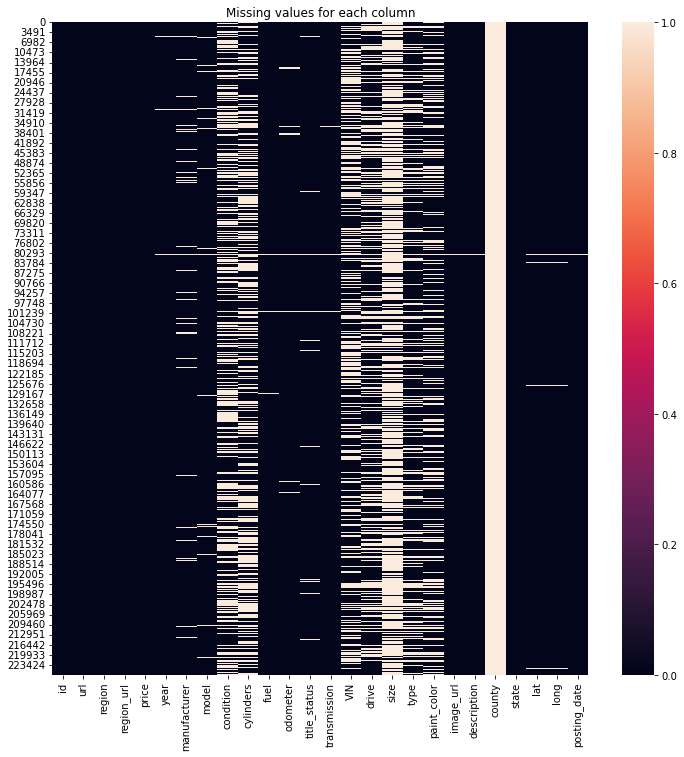

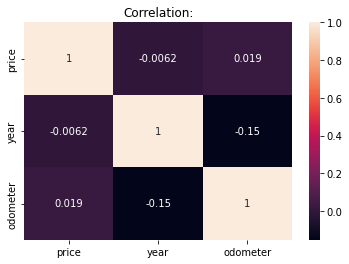

,num_listings,avg_price
manufacturer,,
ford,37472,14995.0
chevrolet,29541,14500.0
toyota,18775,12000.0
honda,11168,8900.0
nissan,10033,9500.0
jeep,9717,16995.0
ram,8857,26750.0
gmc,8705,19995.0
bmw,7746,16995.0


In [38]:
plt.figure(figsize=(12,12))
plt.title("Missing values for each column")
sns.heatmap(df.isnull())
plt.show()

cols = ["price","year", "odometer"]#heatmap--
sns.heatmap(df[cols].corr(), annot = True)
plt.title("Correlation:")
plt.show()

m_c=df.groupby('manufacturer').agg(
    num_listings=('manufacturer','size'),
    avg_price=('price','median'))
m_c=m_c.sort_values(by='num_listings', ascending=False)
m_c

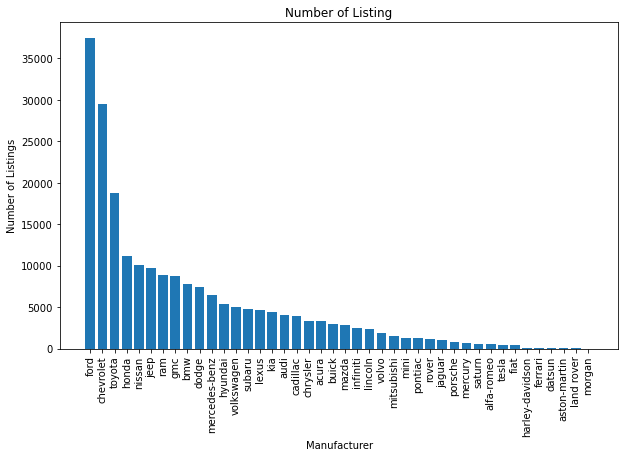

id                   0
url                  0
region               0
region_url           0
price                0
year               829
manufacturer      9649
model             2652
condition        90552
cylinders        94711
fuel              1060
odometer          2230
title_status      4644
transmission      1072
VIN              86268
drive            71025
size            163354
type             50809
paint_color      68996
image_url           22
description         24
county          226880
state                0
lat               1882
long              1882
posting_date        22
dtype: int64

In [39]:
plt.figure(figsize=(10,6))
plt.bar(m_c.index, m_c['num_listings'])
plt.title('Number of Listing')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Listings')
plt.xticks(rotation=90)
plt.show()
df.isnull().sum()

In [40]:
df['odometer'].fillna(df['odometer'].mean(),inplace=True)
df.drop(df[(df['cylinders'].isna()) & (df['transmission'].isna()) & (df['drive'].isna())].index, inplace = True)
df['cylinders'] = df['cylinders'].apply(lambda x: x.split()[0] if not pd.isnull(x) else np.nan)
# Changing cylinders of tesla cars to 0
#df.loc[df.manufacturer == 'tesla', 'cylinders'] = 0
df.cylinders.fillna(0, inplace = True)
df.cylinders =  df.cylinders.replace('other', 0)
df['cylinders'] = df['cylinders'].astype(int)
df.condition.replace('like new', 'excellent', inplace = True)
df.condition.replace('new', 'excellent', inplace = True)
df.fuel.fillna('gas', inplace = True)
df['fuel'].unique()
df.transmission.fillna('automatic', inplace = True)
df['age'] = 2023 - df['year']
df.drop(['url','region_url', 'year','VIN','image_url','model','state'], axis = 1, inplace = True)
df.drop(['lat','long','posting_date'], axis = 1, inplace = True)
df.drop(['size','paint_color','county'], axis = 1, inplace = True)
df.drop(['id','region','title_status'], axis = 1, inplace = True)
df['heated_seats'] = np.where((df['description'].str.contains('HEATED SEAT')) |
                           (df['description'].str.contains('heated seat')) |
                           (df['description'].str.contains('Heated Seat')) |
                           (df['description'].str.contains('heated SEAT')) |
                           (df['description'].str.contains('HEATED seat')), 1,0)
df['auto_headlight'] = np.where((df['description'].str.contains('automatic headlight')) |
                                (df['description'].str.contains('auto headlight')) |
                                (df['description'].str.contains('AUTOMATIC HEADLIGHT')) |
                                (df['description'].str.contains('Automatic Headlight')) |
                                (df['description'].str.contains('AUTO HEADLIGHT')) |
                                (df['description'].str.contains('Auto Headlight')), 1,0)
df =  pd.get_dummies(df, columns=['condition'], drop_first = True )
df =  pd.get_dummies(df, columns=['transmission'], drop_first = True )
df =  pd.get_dummies(df, columns=['drive'], drop_first = True )
df =  pd.get_dummies(df, columns=['fuel'], drop_first = True )
df.drop(['manufacturer','type','description'], axis = 1, inplace = True)

q = df['price'].quantile(0.75)
q1 = df['odometer'].quantile(0.75)
df = df[df['price']<q]
df = df[df['odometer']<q1]
df1 = df


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

df = df.dropna()
X = df.drop('price', axis=1)
y = df['price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(mse)

print("RMSE:", lin_rmse)
print("Score:", lin.score(X_test, y_test))


RMSE: 7343.990986266791
Score: 0.1342651474164921


In [42]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=7)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(mse)

print("rmse",tree_rmse)
print("score:",tree.score(X_test, y_test))

rmse 6330.895716708138
score: 0.3566445994145746


In [43]:
from sklearn.ensemble import GradientBoostingRegressor
gr=GradientBoostingRegressor(random_state=7)
gr.fit(X_train, y_train)

y_pred = gr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
gr_rmse = np.sqrt(mse)

print("rmse",gr_rmse)
print("score:",gr.score(X_test,y_test))

rmse 6653.184680153925
score: 0.28947430359901216


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(regressor.score(X_test,y_test)*100)
print("score:",regressor.score(X_test,y_test))

54.80053477316319
score: 0.5480053477316319


In [45]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("score:",model.score(X_test, y_test))

score: 0.1241974155609965


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X = df.drop('price', axis=1)
y = df['price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
sgd = SGDRegressor(max_iter=1000, random_state=42)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
print("sgd:", sgd.score(X_test,y_test))

RMSE: 7355.150714689995
sgd: 0.13163205420234114


In [47]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier1 = LogisticRegression(random_state=42)
classifier2 = SVC(random_state=42)
classifier3 = DecisionTreeClassifier(random_state=42)
voting_classifier = VotingClassifier(
    estimators=[('lr', classifier1), ('svc', classifier2), ('dt', classifier3)],
    voting='hard'  
)

voting_classifier.fit(X_train, y_train)
y_pred = voting_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.835


#### Question 2-1:
Assemble a dataset consisting of predictors/features and target variable from subsampled data. 

What features are relevant for the prediction task?
Are there any features that should be excluded because they leak the target information?
Show visualizations or statistics to support your selection.

#### Question 2-2:
Perform feature selection with a linear model, with appropriate preprocessing and cross-validation, evaluate the generalization performance. 

#### Question 2-3:
Use any one or more non-linear regression model(s) we have introduced (tree, forest, gradient boosting, etc) to improve your result. You can (and probably should) change your preprocessing and feature engineering to be suitable for the model, tune hyperparameters as appropriate. What is the best prediction you can get? Discuss your work here.

You are not required to try all of these models. 